In [1]:
%matplotlib notebook
from IPython.display import display
from ipywidgets import widgets
from scripts.open_spec import *
from scripts.xas_tool import *

In [2]:
# file_directory = "C:\Users\hanr\GitHub\SGM-Beamline\data\spectra_example.dat"
# print file_directory
file_directory = get_abs_path("data/spectra_example.dat")
print file_directory
opened_file = open_spec_data_file(file_directory)
energy_array, mca_array, scaler_array, scan_num = open_all_sgm_xas(opened_file)

C:\Users\hanr\GitHub\SGM-Beamline\data/spectra_example.dat
Scan number: 1
Scan number: 2
Scan number: 3
Scan number: 4
Scan number: 5
Scan number: 6
Scan number: 7
Scan number: 8
Scan number: 9
Scan number: 10
Opened all c scans.


<IPython.core.display.Javascript object>


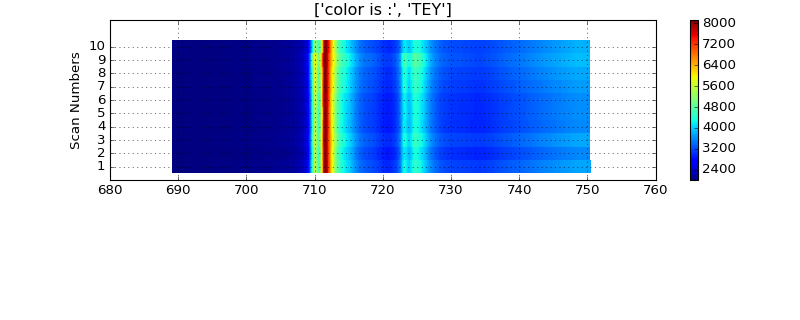

Generated plot for No. 1 in c scan array.  Real scan number is: 1
Generated plot for No. 2 in c scan array.  Real scan number is: 2
Generated plot for No. 3 in c scan array.  Real scan number is: 3
Generated plot for No. 4 in c scan array.  Real scan number is: 4
Generated plot for No. 5 in c scan array.  Real scan number is: 5
Generated plot for No. 6 in c scan array.  Real scan number is: 6
Generated plot for No. 7 in c scan array.  Real scan number is: 7
Generated plot for No. 8 in c scan array.  Real scan number is: 8
Generated plot for No. 9 in c scan array.  Real scan number is: 9
Generated plot for No. 10 in c scan array.  Real scan number is: 10


In [3]:
matplotlib.rcParams['figure.figsize'] = (10, 4)
temp = summary_plot(energy_array, scaler_array, scan_num, "TEY")

<IPython.core.display.Javascript object>


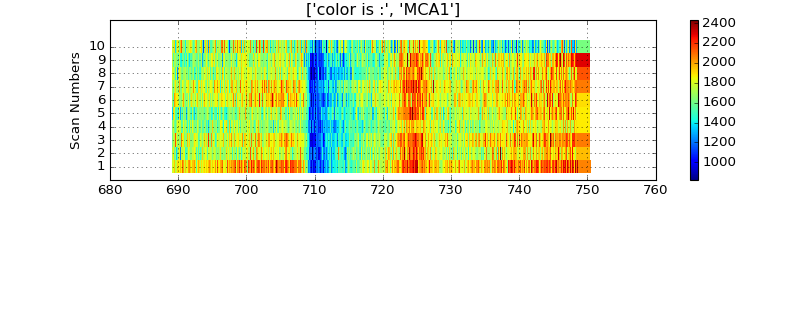

Generated plot for No. 1 in c scan array.  Real scan number is: 1
Generated plot for No. 2 in c scan array.  Real scan number is: 2
Generated plot for No. 3 in c scan array.  Real scan number is: 3
Generated plot for No. 4 in c scan array.  Real scan number is: 4
Generated plot for No. 5 in c scan array.  Real scan number is: 5
Generated plot for No. 6 in c scan array.  Real scan number is: 6
Generated plot for No. 7 in c scan array.  Real scan number is: 7
Generated plot for No. 8 in c scan array.  Real scan number is: 8
Generated plot for No. 9 in c scan array.  Real scan number is: 9
Generated plot for No. 10 in c scan array.  Real scan number is: 10
10


In [4]:
matplotlib.rcParams['figure.figsize'] = (10, 4)
index_of_scan_num = summary_plot(energy_array, mca_array, scan_num, "PFY_SDD1", 30, 90)
print len(index_of_scan_num)

In [5]:
inputText = widgets.Text() 
def generate_array(sender):
	print inputText.value
inputText.on_submit(generate_array)
inputText

5


In [6]:
bad_scan = inputText.value
good_scan_index = generate_good_scan_index(index_of_scan_num, bad_scan)
print index_of_scan_num
print bad_scan

Original scan [u'1', u'2', u'3', u'4', u'5', u'6', u'7', u'8', u'9', u'10']
removed 5
[u'1', u'2', u'3', u'4', u'5', u'6', u'7', u'8', u'9', u'10']
5


## Create bins, assign data points & calculate the average

In [7]:
bins = 600
prepare_eem_spec_result = prepare_eem(good_scan_index, energy_array, mca_array, scaler_array, 690, 750, bins)
mean_energy_array = prepare_eem_spec_result[0]
assigned_data_array = prepare_eem_spec_result[1]
scaler_array = prepare_eem_spec_result[2]
empty_bin_front = prepare_eem_spec_result[3]
empty_bin_back = prepare_eem_spec_result[4]
sdd_bin_data = prepare_eem_spec_result[5]

Total good scan numbers: 9
Start creating bins
Number of Bins: 600
Number of Edges: 601
Energy range is:  690 - 750
created bins completed.

The width of a bin is: 0.1
Start assigning data points into bins
Assign data points completed
Start calcualting average of SDD1(MCA1), SDD2(MCA2), SDD3(MCA3) & SDD4(MCA4)...
No data point is in Bin No. 597 . Average calculation is not necessary
No data point is in Bin No. 598 . Average calculation is not necessary
No data point is in Bin No. 599 . Average calculation is not necessary
No data point is in Bin No. 600 . Average calculation is not necessary
Calculation completed.



## EEM

Plotting incident v emission energy coordinate based on average of SDD(MCA)


<IPython.core.display.Javascript object>


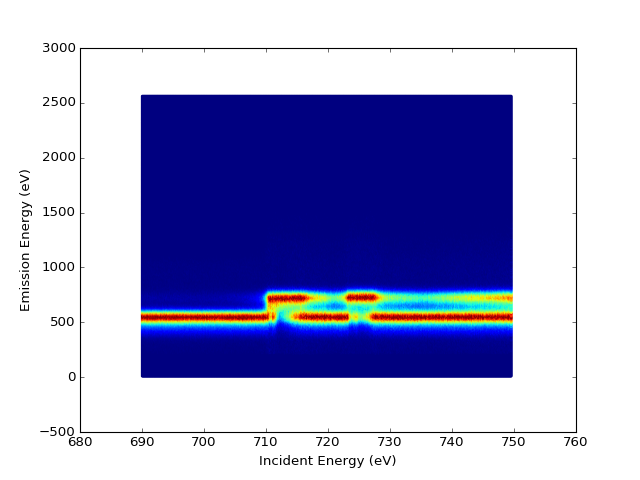

Incident Energy range: 690.05 - 749.55
Emission Energy range: 10 - 2560


In [8]:
# plot avg of SDD 1 in color scatter plot
matplotlib.rcParams['figure.figsize'] = (8,6)
emission_energy_sdd1 = plot_excitation_emission_matrix(mean_energy_array, sdd_bin_data, "SDD1")

In [9]:
pbps_result = prepare_bin_plot (assigned_data_array, scaler_array, sdd_bin_data, empty_bin_front, empty_bin_back, 60, 80)
scaler_bin_data = pbps_result[0]
pfy_bin_data = pbps_result[1]

Start calcualting Average of I0, TEY & Diode...
No data point is in Bin No. 597 . Average calculation is not necessary
No data point is in Bin No. 598 . Average calculation is not necessary
No data point is in Bin No. 599 . Average calculation is not necessary
No data point is in Bin No. 600 . Average calculation is not necessary
Calculation completed.

Getting PFY ROIs


## Plot Average of SDD in a certain region of interest, I0, TEY & Diode

Plotting average XAS.


<IPython.core.display.Javascript object>


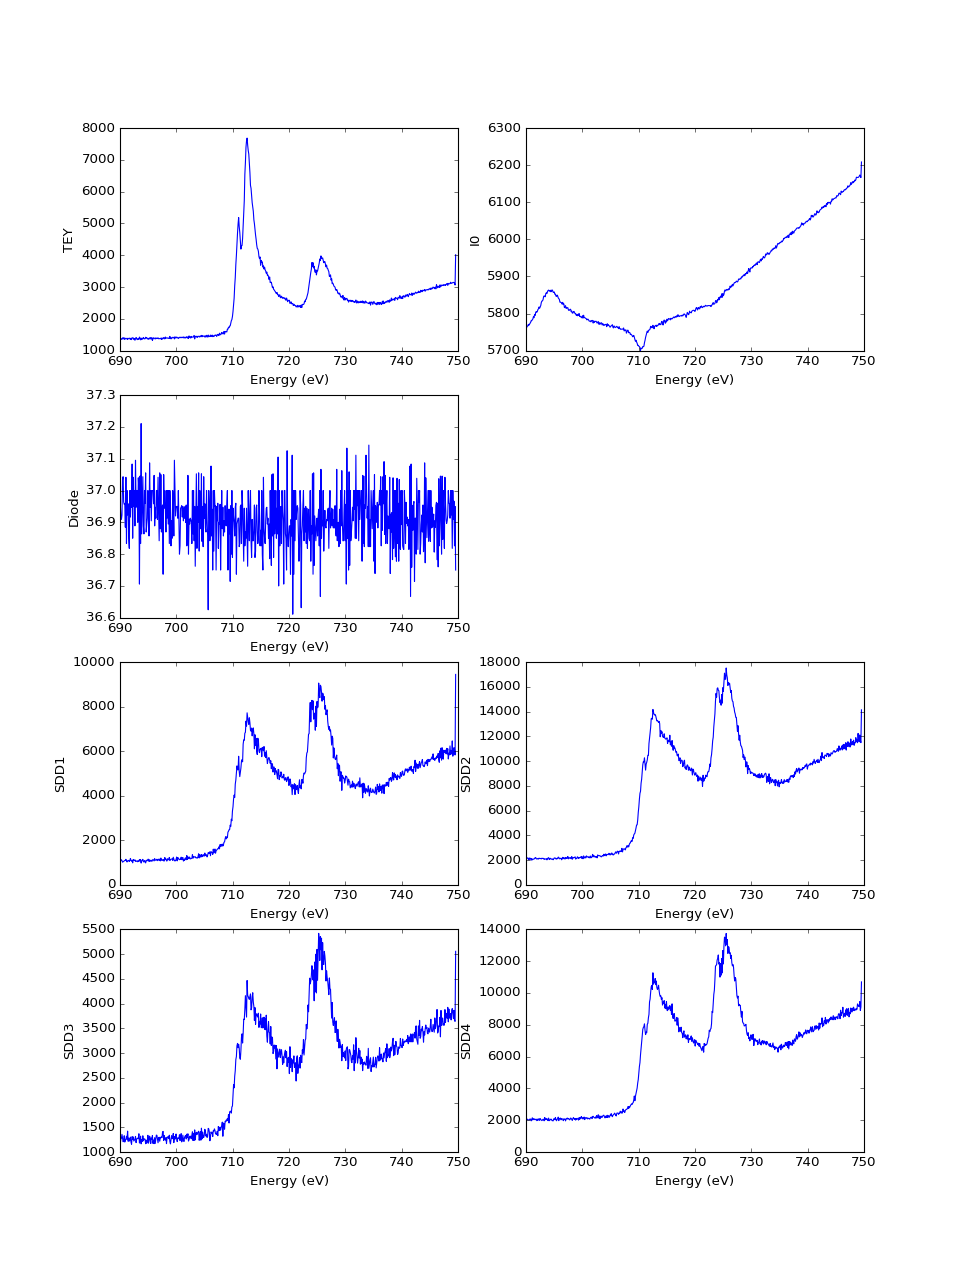

In [10]:
matplotlib.rcParams['figure.figsize'] = (12, 16)
plot_bin_xas_all(mean_energy_array, scaler_bin_data, pfy_bin_data)

## Plot Average of TEY

<IPython.core.display.Javascript object>


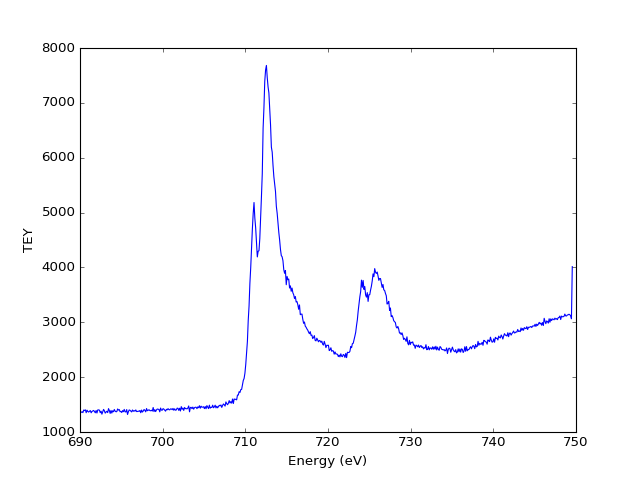

In [11]:
matplotlib.rcParams['figure.figsize'] = (8,6)
plot_bin_xas(mean_energy_array, "TEY", scaler_bin_data)

<IPython.core.display.Javascript object>


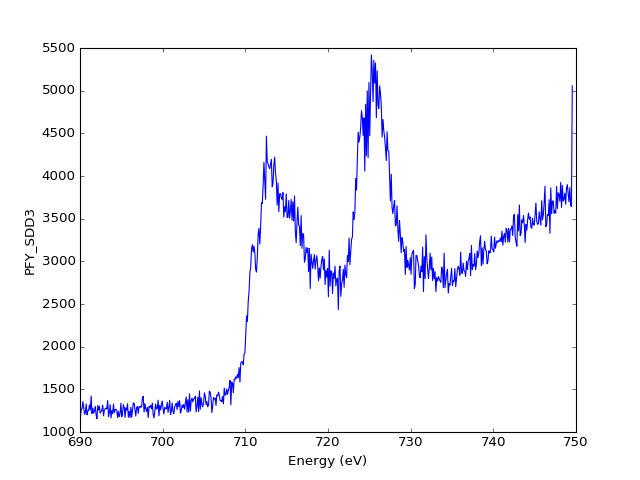

In [12]:
plot_bin_xas(mean_energy_array, "PFY_SDD3", None, pfy_bin_data)

## Export & Save Data

In [13]:
export_data("data/output_avg_pfy_sdd1.xas" ,file_directory, mean_energy_array, "PFY_SDD1", None, pfy_bin_data)

Export data complete!


In [14]:
export_data("data/output_avg_tey.xas", file_directory, mean_energy_array, "TEY", scaler_bin_data)

Export data complete!


In [15]:
export_all("data/output_avg_all.xas", file_directory, mean_energy_array, scaler_bin_data, pfy_bin_data)

Export data complete.


## Normalize and save data

Plotting disivion SDD.


<IPython.core.display.Javascript object>


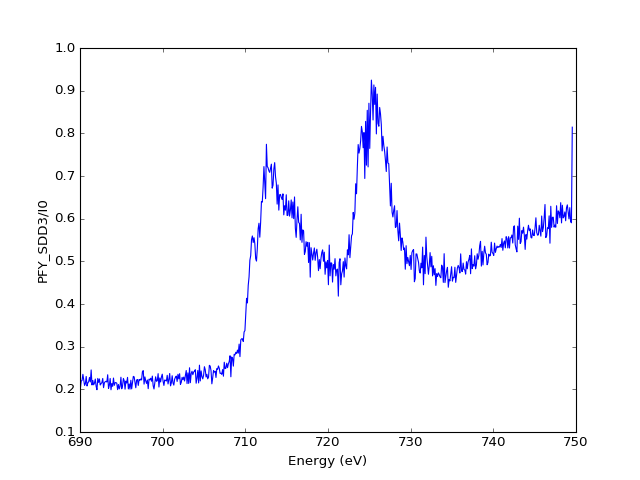

In [16]:
division_array = plot_division(mean_energy_array, pfy_bin_data,  "PFY_SDD3", "I0", scaler_bin_data)

In [17]:
export_normalized_data("data/output_norm_sdd1_i0.xas", file_directory, mean_energy_array, division_array, "Energy", "PFY_SDD3/I0")

Export data complete.
